In [2]:
from os.path import join
from os import listdir
import numpy as np
datapath = 'data'

filecat = 'sketchrnn_cat.npz'

with np.load(join(datapath, filecat)) as cat_data:
    train_cat, val_cat, test_cat = cat_data['train'], cat_data['valid'], cat_data['test']


In [5]:
#train_cat.shape, test_cat.shape, val_cat.shape
type(train_cat[0]),train_cat[0].shape, train_cat[10]

# from utils import strokes_to_lines
# cat0 = strokes_to_lines(train_cat[1])
# print len(cat0), len(cat0[0]), len(cat0[0][0]),cat0[0]

(numpy.ndarray, (96, 3), array([[ -34,   -2,    0],
        [ -26,   28,    0],
        [  -6,   12,    0],
        [  -2,   26,    0],
        [   2,   14,    0],
        [   8,   12,    0],
        [  20,    1,    0],
        [  24,   -5,    0],
        [  16,  -23,    0],
        [   4,  -23,    0],
        [  -4,  -34,    0],
        [  -7,  -11,    0],
        [ -11,   -1,    1],
        [ -38,   60,    0],
        [ -16,   -6,    0],
        [ -20,   15,    0],
        [  -4,    5,    0],
        [   0,    6,    1],
        [  42,   -8,    0],
        [   2,   -6,    0],
        [ -12,   -2,    0],
        [ -19,    5,    0],
        [  -9,    8,    1],
        [  85,  -11,    0],
        [  27,  -13,    0],
        [   2,    3,    1],
        [ -49,   17,    0],
        [  19,   -9,    0],
        [  36,   -6,    1],
        [ -48,   -2,    0],
        [  17,  -12,    0],
        [  24,   -6,    1],
        [ -43,   -1,    0],
        [  34,   -3,    1],
        [ -56,    0,    

In [23]:
from utils import strokes_to_lines
lineLenList=[]
sketchLenList=[]
line2sketch=[]
for sketchInd,sketch in enumerate(train_cat):
    sketchLenList.append(len(sketch))
    lines = strokes_to_lines(sketch)
    for line in lines:
        lineLenList.append(len(line))
        line2sketch.append(sketchInd)

70000 686098
129 37 69.4146714286 21.4514189782
128 1 7.08211800647 7.34870905979 1416
(array([497681,  98208,  44673,  24150,  12249,   5298,   1687,    807,
          501,    301,    188,    164,     83,     52,     27,     14,
            7,      2,      4,      2]), array([   1.  ,    7.35,   13.7 ,   20.05,   26.4 ,   32.75,   39.1 ,
         45.45,   51.8 ,   58.15,   64.5 ,   70.85,   77.2 ,   83.55,
         89.9 ,   96.25,  102.6 ,  108.95,  115.3 ,  121.65,  128.  ]))


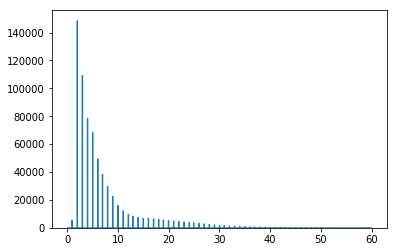

In [53]:
import matplotlib.pyplot as plt
print len(sketchLenList), len(lineLenList)
print np.max(sketchLenList), np.min(sketchLenList), np.mean(sketchLenList), np.std(sketchLenList)
print np.max(lineLenList), np.min(lineLenList), np.mean(lineLenList), np.std(lineLenList), np.sum(np.array(lineLenList)>50)
hist = np.histogram(np.array(lineLenList), bins=20)
print hist
p=plt.hist(np.array(lineLenList), bins='auto',histtype='step', range=(0,60))

642 129
608380


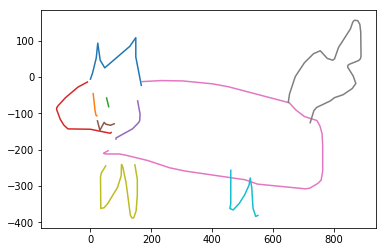

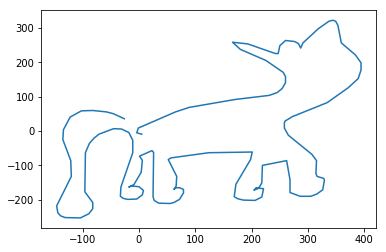

[[ -26  -36    0]
 [ -20  -15    0]
 [ -12   -5    0]
 [ -24   -4    0]
 [ -20    1    0]
 [ -20   18    0]
 [ -12   37    0]
 [  -1   29    0]
 [  14   61    0]
 [   1   46    0]
 [ -26   86    0]
 [   2   20    0]
 [   5    9    0]
 [   8    5    0]
 [  27    1    0]
 [  15  -12    0]
 [   7  -15    0]
 [   0  -18    0]
 [ -14  -31    0]
 [   1 -114    0]
 [   7  -27    0]
 [   8  -15    0]
 [   9  -12    0]
 [  26  -16    0]
 [  14    1    0]
 [  13   10    0]
 [   7   23    0]
 [   0   36    0]
 [ -21  100    0]
 [  -1   27    0]
 [   5    6    0]
 [   8    3    0]
 [  16   -1    0]
 [  10  -12    0]
 [   2  -13    0]
 [  -8  -11    0]
 [ -13   -2    0]
 [  -5    3    0]
 [   9   -7    0]
 [  13  -36    0]
 [   2  -35    0]
 [  -5  -12    0]
 [  22  -16    0]
 [   3    5    0]
 [  -1  129    0]
 [   2   11    0]
 [   8    8    0]
 [  20    1    0]
 [   7   -3    0]
 [  10   -9    0]
 [   7  -19    0]
 [   0  -10    0]
 [  -7   -5    0]
 [  -6    0    0]
 [  -4    5    0]
 [   4  -1

In [26]:
from utils import drawFig

maxsketchInd = np.argmax(sketchLenList)
print maxsketchInd, sketchLenList[maxsketchInd]
maxlenInd = np.argmax(lineLenList)
print maxlenInd

sample = train_cat[maxsketchInd]
drawFig(sample)
# print sample

lineSketch = train_cat[line2sketch[maxlenInd]]
drawFig(lineSketch)
print lineSketch

In [120]:
sampleacc = np.copy(sample)
sampleacc [0,:] = [0,0,0]
sampleacc[1:,0:2] = sample[1:,0:2] - sample[0:-1,0:2]
# sampleacc[:,2] = sample[:,2]
print sampleacc

[[ 0.          0.          0.        ]
 [-0.06949243  0.32429799  0.        ]
 [ 0.27796972 -0.16214901  0.        ]
 [-0.162149    0.57910359  0.        ]
 [ 0.25480556 -0.0694924   0.        ]
 [ 0.16214901 -0.60226774  0.        ]
 [ 0.25480556  0.06949243  0.        ]
 [ 0.41695461 -0.18531314  0.        ]
 [-0.50961119 -0.09265658  0.        ]
 [ 0.20847729 -0.18531314  0.        ]
 [-0.04632828 -0.2084773   0.        ]
 [-0.34746215 -0.23164141  0.        ]
 [-0.25480556  0.23164141  0.        ]
 [ 0.          0.13898486  0.        ]
 [-0.39379042 -0.16214898  0.        ]
 [ 0.41695458  0.41695458  1.        ]
 [-1.38984859  1.73731077  0.        ]
 [ 0.83390909 -2.432235    0.        ]
 [ 0.32429802  0.16214901  0.        ]
 [ 0.25480556  0.18531317  0.        ]
 [ 2.01528049  0.97289401  1.        ]
 [-1.62149    -0.90340161  0.        ]
 [ 0.32429802 -0.27796975  0.        ]
 [-0.20847729 -0.39379042  0.        ]
 [-0.09265658  0.83390915  0.        ]
 [ 0.          0.11582071

In [1]:
import torch 
import torch.nn as nn

rnn = nn.LSTM(10,20,2) # input, hidden, layers
input = torch.randn(5, 3, 10) # seq, batch, input
h0 = torch.randn(2, 3, 20) # layers, batch, hidden
c0 = torch.randn(2, 3, 20) 
output, hn = rnn(input, (h0, c0))

In [2]:
print output.size()
print type(hn), hn[0].size(), hn[1].size()
torch.cat((hn[0][:,1:,:],hn[1][:,1:,:]),dim=1).size()

torch.Size([5, 3, 20])
<type 'tuple'> torch.Size([2, 3, 20]) torch.Size([2, 3, 20])


torch.Size([2, 4, 20])

In [11]:
x=torch.randn(3,20)
xx = x.expand((4,3,20))
print xx.size()
print x
xxx = xx.view(4,6,-1)
print xxx.size()

torch.Size([4, 3, 20])
tensor([[-0.9177,  0.8113,  0.2569,  1.2606, -0.6390, -0.4724,  0.6521,
          1.3955, -0.5262,  0.8308, -1.1170,  1.0073, -0.0636,  0.6234,
          0.3700,  1.6156, -1.0099, -0.4924,  1.0646, -0.2410],
        [-2.3912, -0.6617,  0.5527,  0.3652,  1.2067, -1.8604, -1.7345,
          0.9816, -0.1232,  0.0880,  0.2423,  0.7619,  0.3339, -0.8341,
          0.2880,  1.5234,  1.6911, -1.0647, -0.9138, -0.7486],
        [ 0.5276, -1.4955,  0.5216,  0.8937,  0.1311, -1.9968, -0.3707,
         -1.0174,  0.9638,  1.6404, -0.1292,  0.1416, -2.3453,  0.1384,
         -2.0993,  0.1473,  0.0516,  0.7583, -1.1088, -0.8619]])
torch.Size([4, 6, 10])


In [3]:
import visdom
import numpy as np
vis = visdom.Visdom(env='test', server='http://localhost', port=8097)
loss_win = vis.line(X=np.array([[-1, -1]]), Y=np.array([[0, 0]]),
                         opts=dict(xlabel='steps', ylabel='loss', title='train acc'))

In [19]:
import torch
import torch.nn as nn
from torch.autograd import Variable
hidden_size = 4
bidir = 2 
batch = 3
lstm = nn.LSTM(10, hidden_size, num_layers=1, batch_first=False, bidirectional=True)
hidden_vect_1 = (
    Variable(torch.zeros(bidir, batch, hidden_size)),
    Variable(torch.zeros(bidir, batch, hidden_size)))
output, hidden = lstm(Variable(torch.ones(5, batch, 10)), hidden_vect_1)
print('Output size:', output.size(), '- Hidden size:', [h.size() for h in hidden])
print output
print hidden
for param in lstm.parameters():
    print param.size()

('Output size:', torch.Size([5, 3, 8]), '- Hidden size:', [torch.Size([2, 3, 4]), torch.Size([2, 3, 4])])
Variable containing:
(0 ,.,.) = 
  0.0760  0.1711  0.3012  0.0501  0.1726  0.2089  0.7477 -0.5038
  0.0760  0.1711  0.3012  0.0501  0.1726  0.2089  0.7477 -0.5038
  0.0760  0.1711  0.3012  0.0501  0.1726  0.2089  0.7477 -0.5038

(1 ,.,.) = 
  0.1326  0.2711  0.4182  0.0710  0.1684  0.2068  0.7187 -0.5028
  0.1326  0.2711  0.4182  0.0710  0.1684  0.2068  0.7187 -0.5028
  0.1326  0.2711  0.4182  0.0710  0.1684  0.2068  0.7187 -0.5028

(2 ,.,.) = 
  0.1706  0.3297  0.4673  0.0841  0.1583  0.2021  0.6655 -0.4967
  0.1706  0.3297  0.4673  0.0841  0.1583  0.2021  0.6655 -0.4967
  0.1706  0.3297  0.4673  0.0841  0.1583  0.2021  0.6655 -0.4967

(3 ,.,.) = 
  0.1947  0.3656  0.4909  0.0934  0.1337  0.1884  0.5633 -0.4721
  0.1947  0.3656  0.4909  0.0934  0.1337  0.1884  0.5633 -0.4721
  0.1947  0.3656  0.4909  0.0934  0.1337  0.1884  0.5633 -0.4721

(4 ,.,.) = 
  0.2098  0.3885  0.5034  0.1